## Código de honor


> "Al entregar la solución de este parcial, yo, __Santiago Martínez Novoa__ con código __202112020__ me comprometo a no conversar durante el desarrollo de este examen con ninguna persona que no sea el profesor del curso, sobre aspectos relacionados con el parcial; tampoco utilizaré algún medio de comunicación por voz, texto o intercambio de archivos, para consultar o compartir con otros, información sobre el tema del parcial. Ni usaré alguna IA para resolver las preguntas del parcial. Soy consciente y acepto las consecuencias que acarreará para mi desempeño académico cometer fraude en este parcial"

## Respuestas a las preguntas del parcial
1. [10%] Defina el enfoque analítico que va a darle al proyecto e incluya su justificación.
Recuerde incluir los tipos de aprendizaje, tareas de aprendizaje y técnicas de aprendizaje automático
que va a utilizar para lograr los objetivos que persigue la organización. De igual manera, no olvide
explicarle a los directivos de la organización que lo contrata, la razón por la cual su propuesta es
apropiada.

Para abordar el proyecto de manera más completa y efectiva, propongo emplear un enfoque analítico que se base en el aprendizaje supervisado, específicamente utilizando técnicas de regresión lineal. Este enfoque nos permitirá predecir los precios de los nuevos automóviles basándonos en sus características, aprovechando el conjunto de datos que contiene información detallada sobre los precios relacionados. La regresión lineal es una técnica adecuada debido a la relación lineal que se puede esperar entre las características de un automóvil y su precio, lo que simplifica el modelado y facilita la interpretación de los resultados. Además, brinda la oportunidad de comprender el impacto o impacto de cada característica en el precio final del automóvil y esto permitirá a AlpesAutos tener un mayor conocimiento de las características por las cuales un carro puede aumentar o disminuir su precio, que eventualmente lleva a una mejor fijación de precios. Más especificamente, propongo utilizar una Regresión regularizada L2 con un alpha que será determinado a través de la búsqueda de hiperparámetros utilizando un gridsearch para prevenir el sobreajuste y encontrar las columnas que en realidad son importantes a la hora de predecir el precio de un automovil en AlpesAutos. Este enfoque no solo mejorará la precisión de las predicciones de precios de la empresa, sino que también permitirá a AlpesAutos maximizar sus ganancias, aumentar la satisfacción de sus clientes y minimizar sus pérdidas a la hora de poner un carro a la venta,. 

 
2. [30%] Describa y haga un análisis del resultado del análisis de calidad de los datos suministrados (anexos a este enunciado) que hace parte de la fase de entendimiento de los datos de la metodología ASUM-DM. De igual manera, muestre un subconjunto de los datos luego del preprocesamiento que analítico propuesto y explique y justifique las tareas de transformación que hizo.

Ver en Notebook sección Decisión de transformación

3. [15%] Muestre el resultado que arroja la ejecución del modelo de analítica propuesto, con los datos suministrados para la consultoría. Explique cómo el resultado obtenido responde a los objetivos de la organización que lo contrató y si es posible o no utilizar dicho modelo en la organización. Recuerde argumentar sus decisiones con base en la interpretación cuantitativa y cualitativa de los resultados del modelo.

Ver validación de métricas y conclusiones.




## Anexo Notebook ejecutado

#### Diccionario de los datos

- marca: Marca del vehículo
- modelo: Modelo particular del vehículo
- version: Versión del modelo del vehículo
- precio: Precio de venta real del vehículo
- precio_financiado: Precio de venta del vehículo cuando la compra es financiada por AlpesAutos
- combustible: Tipo de combustible del motor
- año: Año de fabricación del vehículo
- kms: Kilómetros recorridos del vehículo (kilometraje)
- potencia: Potencia del motor del vehículo
- puertas: Número de puertas del vehículo
- transmision: Tipo de transmisión del vehículo
- color: Color del vehículo
- fecha_publicacion: Fecha de publicación del vehículo en el sistema de ventas de AlpesAutos



## 0. Preparación inicial
### 0.1. Importar librerías

In [293]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, SelectPercentile
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,ConfusionMatrixDisplay, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree, DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
import graphviz
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import classification_report, confusion_matrix, PrecisionRecallDisplay
from sklearn.calibration import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso


#Librerías extras
import itertools
import os

from datetime import datetime

print(f"La versión de sklearn es: {sklearn.__version__}")

La versión de sklearn es: 1.4.1.post1


### 0.2. Carga de datos

In [294]:
data = pd.read_excel('./Data/datos_coches_alpesautos_parcial.xlsx')

data.head()

,marca,modelo,version,precio,precio_financiado,combustible,año,kms,potencia,puertas,transmision,color,fecha_publicacion
0,BMW,Serie 1,BMW Serie 1 116d 5p.,14000,NaN,Diésel,2014,63000,116.0,5,Manual,Rojo,2020-11-07 12:55:00
1,TOYOTA,Auris,TOYOTA Auris 120D Active Touring Sports 5p.,13500,NaN,Diésel,2015,33000,124.0,5,Manual,Blanco,2021-01-06 11:35:00
2,FORD,Focus,FORD Focus 1.6 TIVCT 92kW Trend Sportbr 5p.,10950,9550.0,Gasolina,2018,19120,125.0,5,Manual,Negro,2021-01-11 18:32:00
3,PORSCHE,911,PORSCHE 911 CARRERA 4 COUPE 2p.,20990,NaN,Gasolina,1999,190000,300.0,2,Automático,Negro,2021-01-13 19:13:00
4,AUDI,A3,AUDI A3 S line 30 TFSI 85kW 116CV Sportback 5p.,23700,21900.0,Gasolina,2019,24900,116.0,5,Manual,Blanco,2020-12-23 17:41:00


In [295]:
#Se realiza la separación de los datos en train y test
train, test = train_test_split(data, test_size=0.2, random_state=19)
train.head()

,marca,modelo,version,precio,precio_financiado,combustible,año,kms,potencia,puertas,transmision,color,fecha_publicacion
886,KIA,Carnival,KIA,4500,NaN,Diésel,2005,93000,NaN,5,Manual,Beige,2020-07-23 13:36:00
862,AUDI,A4,AUDI A4 2.0 TDI 140cv 4p.,2999,NaN,Diésel,2006,298000,140.0,4,Manual,Azul,2021-01-14 15:54:00
804,AUDI,A1,AUDI A1 Sportback Advanced 25 TFSI 70kW 95CV 5p.,21900,19900.0,Gasolina,2020,2500,95.0,5,Manual,Blanco (Negro Mito Metalizado),2021-01-06 18:21:00
924,KIA,XCeed,KIA XCeed 1.4 TGDi Emotion 103kW DCT 5p.,22950,20150.0,Gasolina,2020,15000,140.0,5,Manual,Blanco (BLANCO),2021-01-05 17:44:00
311,BMW,Serie 2 Active Tourer,BMW Serie 2 Active Tourer 218d 5p.,17000,NaN,Diésel,2015,62000,150.0,5,Manual,Blanco,2020-11-05 07:40:00


## 1. Entendimiento de los datos

### 1.1. Exploración de los datos

Es fundamental entender el dataset, por lo que primero que se revisará es el diccionario de los datos. Luego de entenderlos se procederá a buscar anomalías en los datos con la ayuda de panmdas profiling y un par de consultas sencillas.

In [296]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 886 to 605
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   marca              800 non-null    object        
 1   modelo             800 non-null    object        
 2   version            800 non-null    object        
 3   precio             800 non-null    int64         
 4   precio_financiado  380 non-null    float64       
 5   combustible        789 non-null    object        
 6   año                800 non-null    object        
 7   kms                800 non-null    int64         
 8   potencia           679 non-null    float64       
 9   puertas            800 non-null    object        
 10  transmision        799 non-null    object        
 11  color              785 non-null    object        
 12  fecha_publicacion  800 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 

Parecen haber 7 variables categóricas y 6 numéricas. Una de estas columnas parece tener problemas por la letra ñ en su nombre (`año`) y clasifica los datos incorrectamente, es necesario que `año` sea una variable numérica y por términos de simplicidad y evitar complejizar el modelo se decide transformar también el tipo de `fecha_publicacion` a object.Esto también sucede para `puertas` y deben ser transformadas. Esto se hará antes de la sección de transformación pero in embargo sera referenciado como la _Decisión 0_

In [297]:
#Cambiar variable fecha_publicacion a object
train['fecha_publicacion'] = train['fecha_publicacion'].astype('str')
test['fecha_publicacion'] = test['fecha_publicacion'].astype('str')

train['modelo'] = train['modelo'].astype('str')
test['modelo'] = test['modelo'].astype('str')

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 886 to 605
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marca              800 non-null    object 
 1   modelo             800 non-null    object 
 2   version            800 non-null    object 
 3   precio             800 non-null    int64  
 4   precio_financiado  380 non-null    float64
 5   combustible        789 non-null    object 
 6   año                800 non-null    object 
 7   kms                800 non-null    int64  
 8   potencia           679 non-null    float64
 9   puertas            800 non-null    object 
 10  transmision        799 non-null    object 
 11  color              785 non-null    object 
 12  fecha_publicacion  800 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 87.5+ KB


In [298]:

train['año'].value_counts()

año
2019    82
2016    77
2020    72
2017    68
2018    59
2015    57
2014    43
2005    31
2006    30
2010    29
2007    29
2008    27
2009    25
2012    24
2013    22
2011    21
2003    17
2004    16
2002    12
1999    11
2000    11
2001     9
1997     9
2021     4
1998     3
1990     2
1994     1
1995     1
1992     1
1986     1
1993     1
1991     1
2M19     1
2M16     1
1996     1
1984     1
Name: count, dtype: int64

In [299]:
train['puertas'].value_counts()

puertas
5         568
4         110
3          71
2          41
Cinco       8
Cuatro      2
Name: count, dtype: int64

Aquí se encuentra porque no se toma la variable año como entero, existen datos que poseen valores erróneos

In [300]:
train.describe()

,precio,precio_financiado,kms,potencia
count,800.000000,380.000000,8.000000e+02,679.000000
mean,15357.296250,18986.126316,1.186911e+05,151.684831
std,13626.145226,12239.987310,1.593112e+05,87.878894
min,400.000000,1490.000000,-4.500000e+01,45.000000
25%,5990.000000,11460.500000,3.161725e+04,110.000000
50%,12500.000000,16400.000000,9.900000e+04,130.000000
75%,19990.000000,22200.000000,1.700000e+05,165.000000
max,119900.000000,109200.000000,2.950000e+06,1500.000000


Aquí ya puede evidenciarse algunas discrepancias de rango con respecto a lo estipulado en el diccionario de datos, por ejemplo en la variable de kilómetro. Será necesario mirarlo más a fondo en la distribución de los datos durante el perfilamiento de los datos.

In [301]:
print(f"El número de atributos es: {train.shape[1]} y el número de instancias es: {train.shape[0]}")

El número de atributos es: 13 y el número de instancias es: 800


In [302]:
print("Total de registros duplicados iniciales: ",train.duplicated(keep = False).sum())

Total de registros duplicados iniciales:  0


In [303]:
print("Total de registros con valores nulos:\n",train.isnull().sum())

Total de registros con valores nulos:
 marca                  0
modelo                 0
version                0
precio                 0
precio_financiado    420
combustible           11
año                    0
kms                    0
potencia             121
puertas                0
transmision            1
color                 15
fecha_publicacion      0
dtype: int64


In [304]:
print("Porcentaje de valores nulos:\n")
round(100*(train.isnull().sum()/len(train)), 2).sort_values(ascending=False)

Porcentaje de valores nulos:



precio_financiado    52.50
potencia             15.12
color                 1.88
combustible           1.38
transmision           0.12
marca                 0.00
modelo                0.00
version               0.00
precio                0.00
año                   0.00
kms                   0.00
puertas               0.00
fecha_publicacion     0.00
dtype: float64

Debido al alto porcentaje de valores nulos que existe en el Dataset para la columna de `precio_financiado`, es necesario retirarla completamente. Así como para la `potencia` también será necesario pues una imputación de datos no sería coherente dado la definición de esa columna. Para los demás datos al ser tan poco el porcentaje de valores faltantes simplemente se eliminarán los registros.

In [305]:
#Profiling del dataset
ProfileReport(train, title="Pandas Profiling Report", explorative=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Aquí es posible encontrar que en la columna de `km` existen valores fuera de rango que requieren ser retirados, pues no existe un carro que pueda tener kilometraje negativo.

### Comportamiento variables numéricas

Es necesario revisar las correlaciones para las variables numéricas, de existir una correlación superior a 0.8 se considera lo suficientemente alta como para que una de las columnas tenga que ser eliminada con el objetivo de asegurar la independencia entre las variables independientes y promoviendo a la reducción de dimensionalidad. Conservar únicamente una de las columnas garantiza una representación más coherente de los datos, evitando discrepancias en la interpretación.



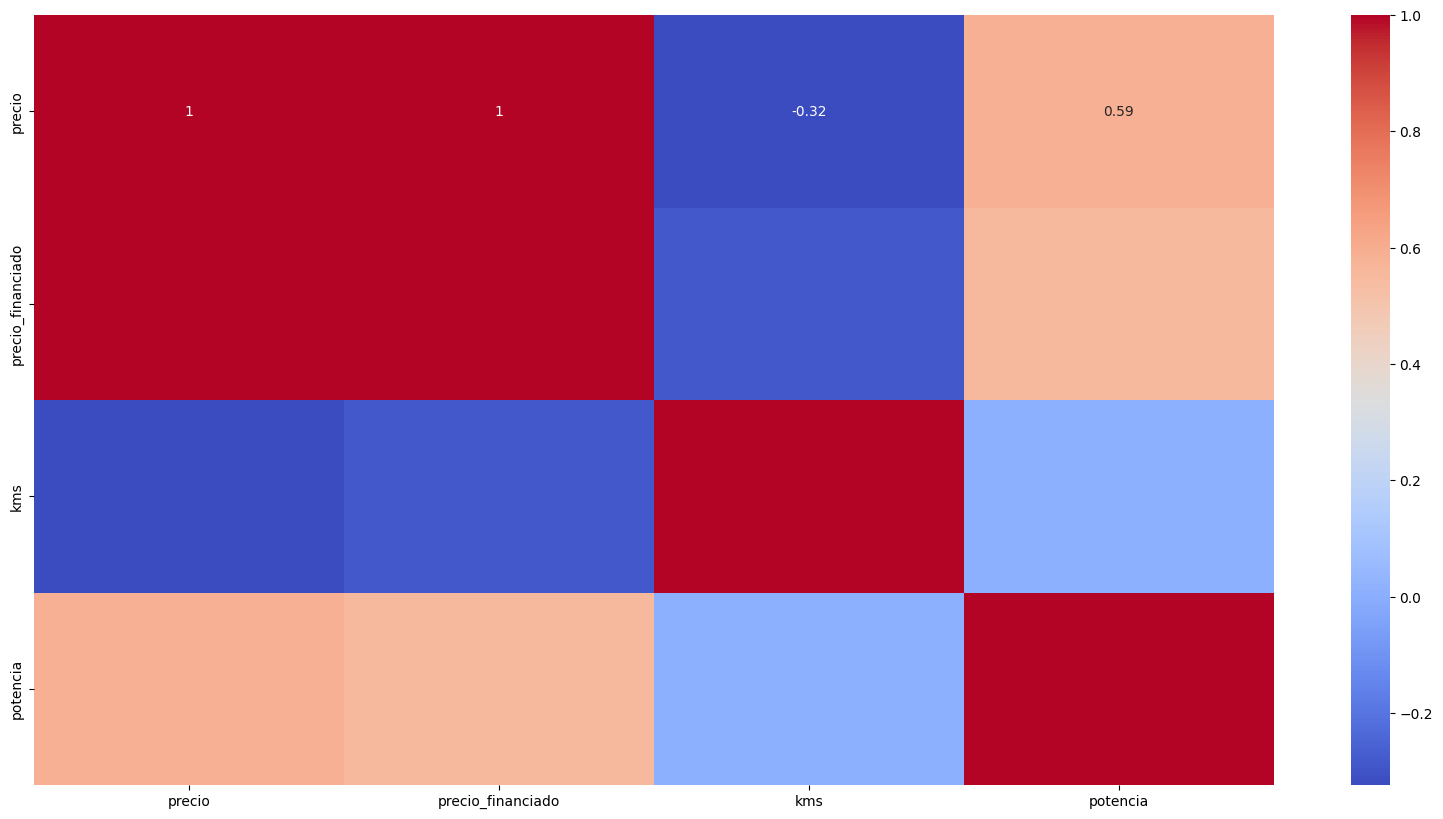

In [ ]:
# Filtrar las columnas que son de tipo int o float para quitar las columnas categóricas
numeric_cols = train.select_dtypes(include=['int', 'float'])

# Calcular la matriz de correlación solo para esas columnas
correlation_matrix = numeric_cols.corr()

# Crear el heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [ ]:
high_correlation_indices = np.where(np.abs(correlation_matrix) > 0.8)

# Filtrar las correlaciones para evitar duplicados y la diagonal principal
correlations = [(numeric_cols.columns[i], numeric_cols.columns[j], correlation_matrix.iloc[i, j])
                for i, j in zip(*high_correlation_indices) if i != j]
printed = []
# Mostrar las correlaciones mayores a 0.8
for col1, col2, corr in correlations:
    if (col1,col2) not in printed and (col1,col2) not in printed:
        print(f"Correlación entre {col1} y {col2}: {corr}")
        printed.append((col1,col2))
        printed.append((col2,col1))

Correlación entre precio y precio_financiado: 0.9972927740931476


Ya es posible observar que existe una correlación altísima entre `precio` y  `precio_financiado`, por lo que solo se mantendrá la variable de `precio` pues de las dos es la más representativa.

### Comportamiento de las variables categóricas

Como se está utilizando un algoritmo de regresión lineal, este no puede trabajar con variables categóricas y es necesario determinar qué variables pueden ser transformadas para que sean tomadas en cuenta y se puedan transformar correctamente. 

In [ ]:
#Determinar unicidad en los datos de las columnas categoricas en porcentaje
categorical_cols = train.select_dtypes(include=['object'])

#Mostrar los valores únicos de las columnas categóricas
for col in categorical_cols.columns:
    print(f"Columna: {col}, Valores únicos:{categorical_cols[col].nunique()}, Valores únicos(%): {round(100*categorical_cols[col].nunique()/categorical_cols.shape[0], 2)}%")

Columna: marca, Valores únicos:43, Valores únicos(%): 5.38%
Columna: modelo, Valores únicos:286, Valores únicos(%): 35.75%
Columna: version, Valores únicos:713, Valores únicos(%): 89.12%
Columna: combustible, Valores únicos:7, Valores únicos(%): 0.88%
Columna: año, Valores únicos:36, Valores únicos(%): 4.5%
Columna: puertas, Valores únicos:6, Valores únicos(%): 0.75%
Columna: transmision, Valores únicos:2, Valores únicos(%): 0.25%
Columna: color, Valores únicos:135, Valores únicos(%): 16.88%
Columna: fecha_publicacion, Valores únicos:797, Valores únicos(%): 99.62%


Como se puede observar, la variable de `fecha_publicación` tiene una cardinalidad bastante alta y por lo tanto es necesario eliminarla o transformarla para que haya menos cardinalidad en los datos. Como puede que la fecha de publicación sea importante porque existen temporadas donde se compran más automoviles y esto afecte el precio, se decidió transformar la fecha para que solo sea mes-año. En el caso de versión al ser tan única cada elemento es imposible que el modelo se aproveche correctamente de esta columna pues es muy difícil de generalizar, por lo tanto deberá ser eliminada.

Dado el número de valores únicos que hay en las diferentes variables se propone un OneHot encoder para `puertas`, `transmision` y `combustible`, para el resto de las columnas se utilizará ordinal encoder debido a la cantidad elevada de elementos únicos, el DataFrame se volvería inmanejable de lo contrario.

### Decisiones de transformación de los datos

#### Consistencia

**Decisión 3:** Eliminar las columnas que tengan una correlación alta para asegurar la independencia entre las variables, en este caso `precio_financiado`.

**Decisión 4:** Convertir las columnas categóricas en variables categóricas utilizando OrdinalEncoder y One Hot Encoder, de acuerdo a lo definido durante el entendimiento de datos.

**Decisión 0:** Eliminar registros donde existan valores que no son consistentes con la columna, en este caso en la columna de `año`.

#### Validez
**Decisión 5:** Transformar los datos de la columna `fecha_publicacion` para que pueda ser agrupada por mes y año, y eliminar la columna `version`. Reduciendo la cardinalidad de los datos.

**Decisión 6:** Eliminar la columna `color` debido a su múltiples valores vacíos, su falta de relevancia a la hora de fijar el precio de un carro y por su alta cardinalidad.

**Decisión 7:** Eliminar registros que se encuentren por fuera de los rangos en este caso de la columna `km`.

#### Unicidad
Los valores ya cumplen con esta dimensión pues no existen registros duplicados en el dataset
#### Completitud
**Decisión 1:** Eliminar la columna `precio_financiado` y `potencia` por el alto porcentaje de valores faltantes.

**Decisión 2:** Eliminar las instancias con valores faltantes en las columnas no eliminadas en la _Decisión 1_.


In [ ]:
import pandas as pd

# Definir la función para eliminar registros nulos, registros negativos en la columna 'km' y registros no numéricos en la columna 'año'
def delete_null_and_invalid_registers(data):
    # Eliminar registros nulos en todas las columnas excepto 'precio_financiado' y 'potencia'
    data = data.dropna(subset=[col for col in data.columns if col not in ['precio_financiado', 'potencia']])
    
    # Eliminar registros negativos en la columna 'km'
    data = data[data['kms'] >= 0]
    
    # Convertir la columna 'año' a numérica y luego eliminar registros no numéricos
    data['año'] = pd.to_numeric(data['año'], errors='coerce')
    data = data.dropna(subset=['año'])

    #Reemplazar para la columna puertas 'Cinco' por 5 y 'Cuatro' por 4
    data['puertas'] = data['puertas'].replace('Cinco', 5)
    data['puertas'] = data['puertas'].replace('Cuatro', 4)
    
    
    return data

# Aplicar la función al conjunto de datos
train = delete_null_and_invalid_registers(train)
test = delete_null_and_invalid_registers(test)

# Separar los datos en X_train, y_train, X_test y y_test
X_train = train.drop('precio', axis=1)
y_train = train['precio']
X_test = test.drop('precio', axis=1)
y_test = test['precio']

# Mostrar la información de los datos de entrenamiento
X_train.info()



<class 'pandas.core.frame.DataFrame'>
Index: 771 entries, 886 to 605
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marca              771 non-null    object 
 1   modelo             771 non-null    object 
 2   version            771 non-null    object 
 3   precio_financiado  372 non-null    float64
 4   combustible        771 non-null    object 
 5   año                771 non-null    float64
 6   kms                771 non-null    int64  
 7   potencia           667 non-null    float64
 8   puertas            771 non-null    int64  
 9   transmision        771 non-null    object 
 10  color              771 non-null    object 
 11  fecha_publicacion  771 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 78.3+ KB


C:\Users\alfre\AppData\Local\Temp\ipykernel_25888\3441686468.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['puertas'] = data['puertas'].replace('Cuatro', 4)
C:\Users\alfre\AppData\Local\Temp\ipykernel_25888\3441686468.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['puertas'] = data['puertas'].replace('Cuatro', 4)


## 2. Transformación de los datos

### 2.1. Creación del Pipeline de transformación


Se tratan primero las variables numéricas

In [ ]:
#Definimos columnas a eliminar por correlación o por irrelevancia, como se repite precios_financiados, se elimina
drop_columns_corr = ['color','version']

#Definimos columnas a eliminar por nulos
drop_columns_null = ['precio_financiado','potencia']

#Para las funciones se utilizan los nombres de las variables para que queden en el archivo pkl
def delete_corr(data):
    return data.drop(drop_columns_corr, axis=1)

def delete_null(data):
    return data.drop(drop_columns_null, axis=1)



num_transformer = Pipeline(
    steps=[
        ('delete_null', FunctionTransformer(delete_null, validate=False)),
        ('scaler', 'passthrough')
    ]
)

Luego tratar variables categóricas.

In [ ]:
def fix_fecha_column(column_value):
    # Convertir 2020-12-16 16:39:54 a solo 2020-12
    return column_value[:7]
    

def fix_cat_values(df):
    for column in df.columns:
        if column == 'fecha_publicacion':
            # Apply the fix_fecha_column function to the 'fecha_publicacion' column
            df[column] = df[column].apply(fix_fecha_column)
    return df

#Probar la función
X_train_test = X_train.copy()
X_train_test = fix_cat_values(X_train_test)
print('Estos son los mes_años: ',X_train_test['fecha_publicacion'].unique())
print('Estos son los numeros de mes-año en que se publicaron: ',X_train_test['fecha_publicacion'].nunique())

Estos son los mes_años:  ['2020-07' '2021-01' '2020-11' '2020-12' '2020-10' '2020-08' '2020-09']
Estos son los numeros de mes-año en que se publicaron:  7


In [ ]:
cat_transformer = Pipeline(
    steps=[
        ('delete_corr', FunctionTransformer(delete_corr, validate=False)),
        ('fix_values', FunctionTransformer(fix_cat_values, validate=False)),
        ('ordinal_or_one_hot', ColumnTransformer(
            transformers=[
                ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ['marca', 'modelo']),
                ('onehot', OneHotEncoder(handle_unknown='ignore'), ['combustible', 'transmision', 'fecha_publicacion'])
            ],
            remainder='passthrough'
        ))
    ]
)

Así se verían los datos transformados, tras realizar todas las transformaciones estipuladas.

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, make_column_selector(dtype_include=np.number)),
        ('cat', cat_transformer, make_column_selector(dtype_include=object))   # Lista de columnas categóricas
    ]
)



#Mostrar los datos limpios tras transformarlos

#Encontrar los nombres de las columnas
cat_transformer.fit(X_train)
one_hot_encoder = cat_transformer.named_steps['ordinal_or_one_hot'].named_transformers_['onehot']
ordinal_encoder = cat_transformer.named_steps['ordinal_or_one_hot'].named_transformers_['ordinal']
cat_column_names = list(ordinal_encoder.get_feature_names_out()) + list(one_hot_encoder.get_feature_names_out())
numeric_column_names = [col for col in X_train.columns if col not in cat_column_names and col not in drop_columns_corr and col not in drop_columns_null and col not in ['fecha_publicacion','transmision','combustible']]
all_column_names = numeric_column_names + cat_column_names


col_names = all_column_names
col_names

#Se realiza la transformación de los datos
X_train_show = preprocessor.fit_transform(X_train)
X_train_show = pd.DataFrame(X_train_show, columns=col_names)

X_train_show.head()


,año,kms,puertas,marca,modelo,combustible_Diésel,combustible_Eléctrico,combustible_Gas licuado (GLP),combustible_Gas natural (CNG),combustible_Gasolina,...,combustible_Híbrido enchufable,transmision_Automático,transmision_Manual,fecha_publicacion_2020-07,fecha_publicacion_2020-08,fecha_publicacion_2020-09,fecha_publicacion_2020-10,fecha_publicacion_2020-11,fecha_publicacion_2020-12,fecha_publicacion_2021-01
0,2005.0,93000.0,5.0,21.0,68.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2006.0,298000.0,4.0,3.0,22.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2020.0,2500.0,5.0,3.0,20.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2020.0,15000.0,5.0,21.0,264.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2015.0,62000.0,5.0,4.0,215.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Modelamiento

Para ahorrar tiempo se va a montar el pipeline de una vez al gridsearch para encontrar el mejor modelo

In [ ]:
reprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, make_column_selector(dtype_include=np.number)),
        ('cat', cat_transformer, make_column_selector(dtype_include=object))   # Lista de columnas categóricas
    ]
)

process = [
        ('transform', preprocessor),
        ('regression', Lasso())  # Regularización Lasso
    ]
pipeline = Pipeline(process)

parameters = {
    'regression__alpha': [0.001, 0.01, 0.1, 1, 2, 3],
    'transform__num__scaler': ['passthrough'],
}

grid_search = GridSearchCV(pipeline, parameters, verbose=2, scoring='neg_mean_squared_error', cv=5,error_score='raise')

In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END regression__alpha=0.001, transform__num__scaler=passthrough; total time=   0.1s


c:\Users\alfre\BI-Sabrosón\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.812e+09, tolerance: 1.207e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\alfre\BI-Sabrosón\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.608e+09, tolerance: 1.126e+07
  model = cd_fast.enet_coordinate_descent(


[CV] END regression__alpha=0.001, transform__num__scaler=passthrough; total time=   0.1s


c:\Users\alfre\BI-Sabrosón\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.309e+10, tolerance: 1.287e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\alfre\BI-Sabrosón\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.281e+09, tolerance: 9.872e+06
  model = cd_fast.enet_coordinate_descent(


[CV] END regression__alpha=0.001, transform__num__scaler=passthrough; total time=   0.1s
[CV] END regression__alpha=0.001, transform__num__scaler=passthrough; total time=   0.0s


c:\Users\alfre\BI-Sabrosón\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.916e+09, tolerance: 1.151e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\alfre\BI-Sabrosón\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.812e+09, tolerance: 1.207e+07
  model = cd_fast.enet_coordinate_descent(


[CV] END regression__alpha=0.001, transform__num__scaler=passthrough; total time=   0.0s
[CV] END regression__alpha=0.01, transform__num__scaler=passthrough; total time=   0.0s


c:\Users\alfre\BI-Sabrosón\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.609e+09, tolerance: 1.126e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\alfre\BI-Sabrosón\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.307e+09, tolerance: 1.287e+07
  model = cd_fast.enet_coordinate_descent(


[CV] END regression__alpha=0.01, transform__num__scaler=passthrough; total time=   0.1s
[CV] END regression__alpha=0.01, transform__num__scaler=passthrough; total time=   0.0s


c:\Users\alfre\BI-Sabrosón\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.591e+09, tolerance: 9.872e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\alfre\BI-Sabrosón\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.917e+09, tolerance: 1.151e+07
  model = cd_fast.enet_coordinate_descent(


[CV] END regression__alpha=0.01, transform__num__scaler=passthrough; total time=   0.0s
[CV] END regression__alpha=0.01, transform__num__scaler=passthrough; total time=   0.0s
[CV] END regression__alpha=0.1, transform__num__scaler=passthrough; total time=   0.0s
[CV] END regression__alpha=0.1, transform__num__scaler=passthrough; total time=   0.0s
[CV] END regression__alpha=0.1, transform__num__scaler=passthrough; total time=   0.0s
[CV] END regression__alpha=0.1, transform__num__scaler=passthrough; total time=   0.0s


c:\Users\alfre\BI-Sabrosón\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.058e+08, tolerance: 1.287e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\alfre\BI-Sabrosón\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.917e+09, tolerance: 1.151e+07
  model = cd_fast.enet_coordinate_descent(


[CV] END regression__alpha=0.1, transform__num__scaler=passthrough; total time=   0.0s
[CV] END regression__alpha=1, transform__num__scaler=passthrough; total time=   0.0s
[CV] END regression__alpha=1, transform__num__scaler=passthrough; total time=   0.0s
[CV] END regression__alpha=1, transform__num__scaler=passthrough; total time=   0.0s
[CV] END regression__alpha=1, transform__num__scaler=passthrough; total time=   0.0s
[CV] END regression__alpha=1, transform__num__scaler=passthrough; total time=   0.1s


c:\Users\alfre\BI-Sabrosón\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.671e+07, tolerance: 1.151e+07
  model = cd_fast.enet_coordinate_descent(


[CV] END regression__alpha=2, transform__num__scaler=passthrough; total time=   0.0s
[CV] END regression__alpha=2, transform__num__scaler=passthrough; total time=   0.0s
[CV] END regression__alpha=2, transform__num__scaler=passthrough; total time=   0.0s
[CV] END regression__alpha=2, transform__num__scaler=passthrough; total time=   0.0s
[CV] END regression__alpha=2, transform__num__scaler=passthrough; total time=   0.0s
[CV] END regression__alpha=3, transform__num__scaler=passthrough; total time=   0.0s


c:\Users\alfre\BI-Sabrosón\BI-Esculapio\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.892e+09, tolerance: 1.151e+07
  model = cd_fast.enet_coordinate_descent(


[CV] END regression__alpha=3, transform__num__scaler=passthrough; total time=   0.0s
[CV] END regression__alpha=3, transform__num__scaler=passthrough; total time=   0.0s
[CV] END regression__alpha=3, transform__num__scaler=passthrough; total time=   0.0s
[CV] END regression__alpha=3, transform__num__scaler=passthrough; total time=   0.0s
CPU times: total: 1.45 s
Wall time: 3.43 s


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('delete_null',
                                                                                          FunctionTransformer(func=<function delete_null at 0x0000010D8DB87100>)),
                                                                                         ('scaler',
                                                                                          'passthrough')]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000010D924B9B50>),
                                                                        ('cat',
                                                                         Pipeline(steps...
                                                                                                                          ('onehot',
                                                                                                                           OneHotEncoder(handle_unknown='ignore'),
                                                                                                                           ['combustible',
                                                                                                                            'transmision',
                                                                                                                            'fecha_publicacion'])]))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000010D924B8990>)])),
                                       ('regression', Lasso())]),
             param_grid={'regression__alpha': [0.001, 0.01, 0.1, 1, 2, 3],
                         'transform__num__scaler': ['passthrough']},
             scoring='neg_mean_squared_error', verbose=2)

Los mejores parámetros encontrados fueron los siguientes:

In [ ]:
best_model = grid_search.best_estimator_
grid_search.best_params_

{'regression__alpha': 3, 'transform__num__scaler': 'passthrough'}

In [ ]:
y_pred_train_lasso = best_model.predict(X_train)
y_pred_train_lasso

array([  2825.88768368,   4188.38368875,  19686.62488427,  21225.29247638,
        13081.45444431,  22725.03543857,  18813.78499329,  16276.79878453,
        24308.89325362,  28021.06745587,  20619.75073759,  18356.15915923,
        15092.02431956,    818.16073654,   5417.45117123,  20449.96986195,
        18923.26465727,   2082.33763546,  17425.27160916,  -7545.65313365,
        16674.53110497,    417.2802748 ,  17744.92077287,  27107.74422199,
        19483.76251109,  17743.70533928,  16341.10987118,   5448.42312717,
         9821.53026689,  20078.65998528,  24527.316072  ,  -1143.77122933,
        28162.73680513,  24251.19326921,   7780.24145302,  19823.94007388,
        19693.23522855,  17355.22919717,   7107.5670566 ,   4946.48465523,
         6632.35126257,  19291.12812278,  17601.08290951,  11709.36926481,
         5835.2684774 ,  11918.37127606,  23300.51098066,  18096.9075931 ,
        16725.31875046,   9650.62555792,  24694.67362488,  33567.90231088,
        12256.03860238,  

## Evaluación de Métricas

In [ ]:
n,p = X_train.shape

print('------------ Regresión  Regularizada Lasso con entrenamiento------------')
print("Residual sum of squares (RMSE): %.2f" % np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)))
print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(y_train, y_pred_train_lasso))
print("R2-score: %.5f" % r2_score(y_train, y_pred_train_lasso) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_train, y_pred_train_lasso))*(n-1)/(n-p-1)) )

#Evaluar el modelo con los datos de test
y_pred_test_lasso = best_model.predict(X_test)

print('------------ Regresión  Regularizada Lasso con test------------')
print("Residual sum of squares (RMSE): %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)))
print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(y_test, y_pred_test_lasso))
print("R2-score: %.5f" % r2_score(y_test, y_pred_test_lasso) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_test, y_pred_test_lasso))*(n-1)/(n-p-1)) )


------------ Regresión  Regularizada Lasso con entrenamiento------------
Residual sum of squares (RMSE): 9871.32
Mean Absolute Error (MAE): 6017.37
R2-score: 0.47847
Adj R2-score: 0.47021
------------ Regresión  Regularizada Lasso con test------------
Residual sum of squares (RMSE): 12244.67
Mean Absolute Error (MAE): 6203.33
R2-score: 0.21604
Adj R2-score: 0.20363


Como se puede observar, las métricas elegidas para evaluar muestran que el modelo tiene un mal desempeño en general, pues el coeficiente R2 muestra un 48% de variabilidad en la variable objetivo (precio) siendo explicada y para el test es de 21.6%, esto solo puede significar que hay un sobreajuste severo en los datos, lo que indica que debe replantearse la selección de columnas y las transformaciones.  

## Cálculo de coeficientes



In [ ]:
lasso_model = best_model['regression']
print(f'Intercepto: {lasso_model.intercept_}')
coef = list(zip(['Intercepto'] + list(col_names), [lasso_model.intercept_] + list(lasso_model.coef_)))
coef = pd.DataFrame(coef,columns=['Variable','Parámetro'])
coef

Intercepto: -1970780.628652054


,Variable,Parámetro
0,Intercepto,-1.970781e+06
1,año,9.903722e+02
2,kms,-9.991381e-03
3,puertas,-2.195034e+03
4,marca,-4.060821e+01
5,modelo,9.813556e+00
6,combustible_Diésel,0.000000e+00
7,combustible_Eléctrico,-5.606437e+03
8,combustible_Gas licuado (GLP),-2.372679e+03
9,combustible_Gas natural (CNG),0.000000e+00


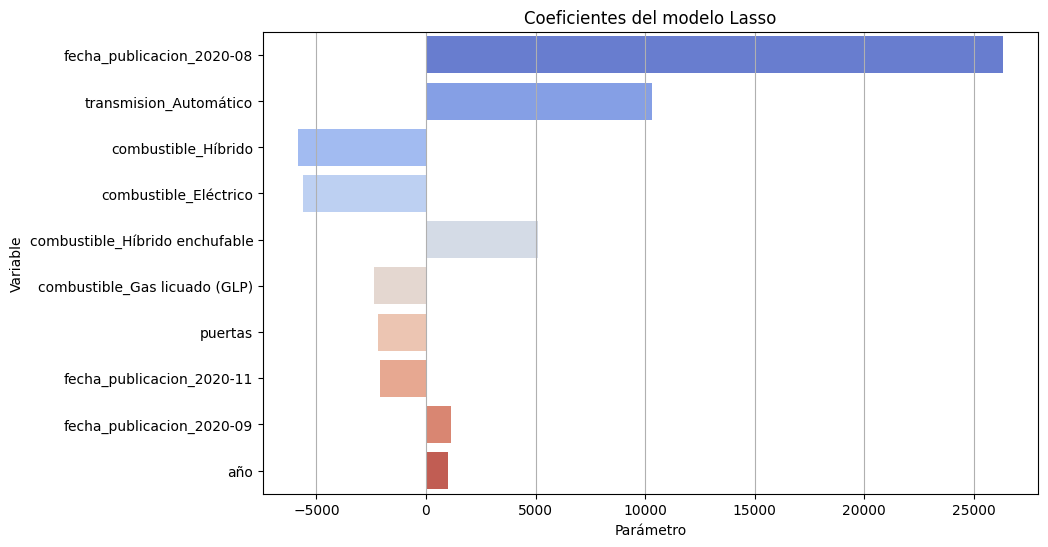

In [ ]:
coef_df = coef.copy()

# Filtrar las variables con coeficientes distintos de cero y sin intercepto
coef_df = coef_df[(coef_df['Parámetro'] != 0) & (coef_df['Variable'] != 'Intercepto')]

# Ordenar por valor absoluto de los coeficientes para facilitar la visualización
coef_df['Abs_Parámetro'] = coef_df['Parámetro'].abs()
coef_df = coef_df.sort_values(by='Abs_Parámetro', ascending=False).head(10)

# Graficar los coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x='Parámetro', y='Variable', data=coef_df, palette='coolwarm')
plt.xlabel('Parámetro')
plt.ylabel('Variable')
plt.title('Coeficientes del modelo Lasso')
plt.grid(axis='x')
plt.show()


## Conclusiones

Luego de validar con las métricas de evaluación es posible decir que el algoritmo no puede ser utilizado con confianza para determinar el precio de un automovil. Sin embargo, gracias a los coeficientes Lasso es posible empezar a entender las diferentes columnas que son influyentes en el cambio del precio como lo es la fecha de publicación, el tipo de combustible, el número de puertas (aunque esto es más una consecuencia que causa pues relaciona el número de puertas a que es más costoso debido a que los deportivos son más costosos per se, no al revés) y el año del carro.

Estas columnas brindan luces para empezar una nueva iteración de los datos para encontrar un mejor modleo que se ajuste mucho mejor a los datos.